<a href="https://colab.research.google.com/github/sasamori-takuya/study_group_materials/blob/master/optimization/optimization_grad_desc_and_newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# np.meshgrid の挙動について確認（メモ）

In [0]:
import numpy as np

In [2]:
x = np.array([0, 1, 2, 3])
y = np.array([4, 5, 6])

print("*** meshgrid(x, y)***")
print("*mesh1*")
mesh1, mesh2 = np.meshgrid(x, y)
print(mesh1.shape)
display(mesh1)
print("*mesh2*")
print(mesh2.shape)
display(mesh2)

print("*** meshgrid(y, x)***")
mesh1, mesh2 = np.meshgrid(y, x)
print("*mesh1*")
print(mesh1.shape)
display(mesh1)
print("*mesh2*")
print(mesh2.shape)
display(mesh2)

*** meshgrid(x, y)***
*mesh1*
(3, 4)


array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

*mesh2*
(3, 4)


array([[4, 4, 4, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6]])

*** meshgrid(y, x)***
*mesh1*
(4, 3)


array([[4, 5, 6],
       [4, 5, 6],
       [4, 5, 6],
       [4, 5, 6]])

*mesh2*
(4, 3)


array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

# 教科書 p26 の図2.1

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import sys

print(sys.version)
print(np.__version__)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
1.18.4


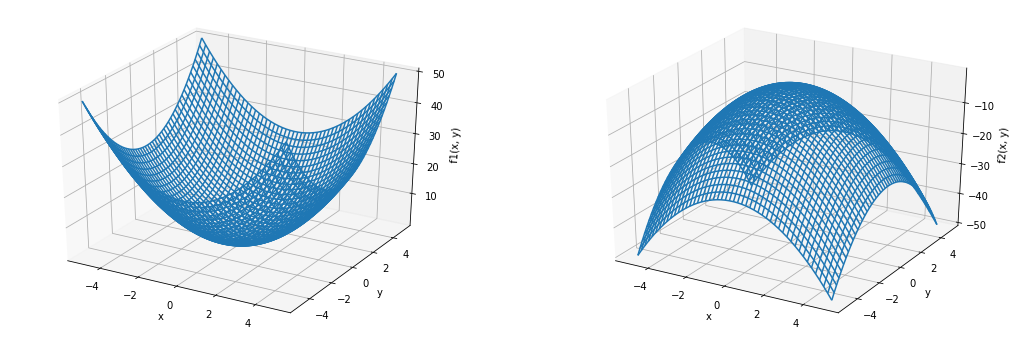

In [4]:
def func1(x, y):
  return x**2 + y**2

def func2(x, y):
  return - x**2 - y**2

N = 50
x1 = np.linspace(-5, 5, N)
x2 = np.linspace(-5, 5, N)
X1, X2 = np.meshgrid(x1, x2)
f1 = func1(X1, X2)
f2 = func2(X1, X2)

fig = plt.figure(figsize=(18,6))

axL = fig.add_subplot(1, 2, 1, projection = "3d")
axL.set_xlabel("x")
axL.set_ylabel("y")
axL.set_zlabel("f1(x, y)")
axL.plot_wireframe(X1, X2, f1)

axR = fig.add_subplot(1, 2, 2, projection = "3d")
axR.set_xlabel("x")
axR.set_ylabel("y")
axR.set_zlabel("f2(x, y)")
axR.plot_wireframe(X1, X2, f2)

plt.show()

# 教科書 p27 の例2.2

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import sys

print(sys.version)
print(np.__version__)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
1.18.4


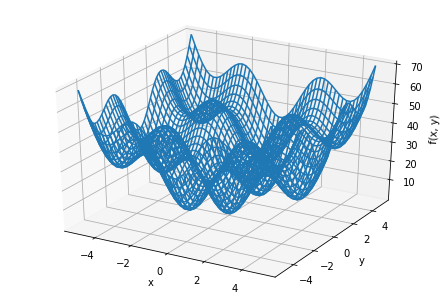

In [6]:
def func(x, y):
  return 10 * 2 + x**2 - 10 * np.cos(np.pi * x / 2) + y**2 - 10 * np.cos(np.pi * y / 2)

N = 50
x1 = np.linspace(-5, 5, N)
x2 = np.linspace(-5, 5, N)
X1, X2 = np.meshgrid(x1, x2)
f = func(X1, X2)
#print(X1.shape)  # (50, 50)
#print(X2.shape)  # (50, 50)
#print(f.shape)  # (50, 50)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.plot_wireframe(X1, X2, f)
plt.show()

# Armijo ルールとバックトラック法による最急降下法

**[step0]**  
Define initial_value $\boldsymbol{x}_0 \in \mathbb{R}^n$.  
Define stop threshold $\epsilon > 0$.  
Set number of updates $k=0$.  
Set initial_value in Armijo step $\alpha>0$.  
Set constant in Armijo step $c_1 \in (0,1)$.  
Set learning rate in Armijo step $\rho \in (0, 1)$.
   
**[step1]**  
Repeat the following algorithm for $k \geq 0$ until there exists $k$ satisfying $\|\nabla f(\boldsymbol{x}_k)\| < \epsilon$: 
> Set $\alpha_0 := \alpha$.  
> Repeat $(*)$ for $j \geq 1$ until there exists $j$ satisfying $f(\boldsymbol{x}_k - \alpha_j \nabla f(\boldsymbol{x}_k)) \leq f(\boldsymbol{x}_k) - c_1 \alpha_j \|\nabla f(\boldsymbol{x}_k)\|^2$:
>> $\alpha_j = \rho \alpha_{j-1} \quad (*)$  
  
> we find $J$.  
> Set $\alpha_k = \rho^J \alpha_0 = \rho^J \alpha$.  
> Set $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k - \alpha_k \nabla f(\boldsymbol{x}_k)$. 

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import sys

print(sys.version)
print(np.__version__)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
1.18.4


In [0]:
class ArmijoGradientDescent:
  def __init__(self, fct, grad, const = 0.3, lr = 0.9, thres = 1e-6, iter_max = 1000, alpha = 1.0):
    self.fct = fct             # 目的関数
    self.grad = grad           # 勾配
    self.const  = const        # Armijo ruleの定数
    self.lr = lr               # 学習率
    self.thres = thres         # 更新停止の閾値
    self.path = None           # 解の点列
    self.iter_max = iter_max   # 最大反復回数
    self.alpha = alpha         # Armijo rule の初期値
  
  def minimize(self, x):
    path = [x]
    
    for i in range(self.iter_max):
      iter_count = i + 1  # 最初の0回目の分がある

      grad = self.grad(x)
      
      if np.linalg.norm(grad, ord = 2, axis = None) < self.thres:
        break
      else:
        alpha = self.alpha
        while self.fct(x - alpha * grad) > (self.fct(x) - self.const * alpha * np.dot(grad, grad)):
          alpha = self.lr * alpha
        
        x = x - alpha * grad
        path.append(x)
    self.iter_count = iter_count  # 反復回数
    self.opt_pt = x               # 最適解
    self.opt_val = self.fct(x)    # 関数の最小値
    self.path = np.array(path)    # 探索解の推移

In [0]:
def f(x):
  return 2 * x[0]**2 + x[1]**2 + x[0]*x[1]

def grad_f(x):
  return np.array([4*x[0] + x[1], x[0] + 2*x[1]])

iter.cnt. = 22
emp.opt.pt. = [-1.55132222e-07  7.98833954e-08]
emp.opt.val. = 4.212088064314927e-14


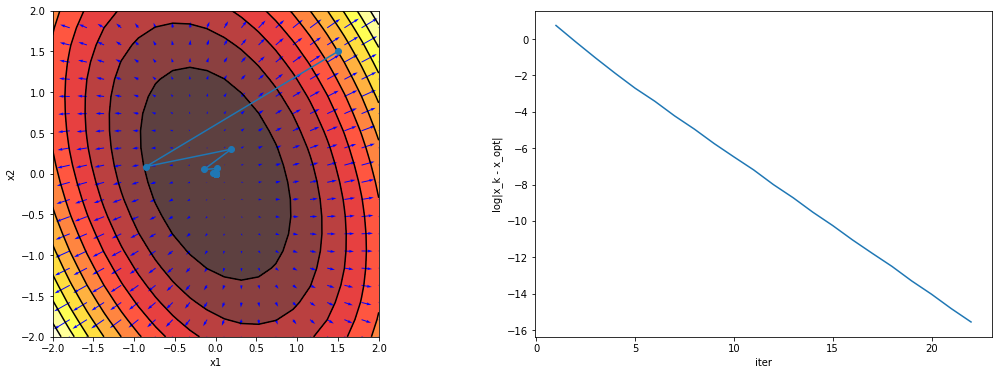

In [10]:
const = 0.3
lr = 0.9
thres = 1e-6
iter_max = 1000
ini_val = np.array([1.5, 1.5])
alpha = 1.0

x1 = np.linspace(-2, 2, 20)  # x1.shape = (20, )
x2 = np.linspace(-2, 2, 20)  # x2.shape = (20, )
X1, X2 = np.meshgrid(x1, x2)  # X1.shape = (20, 20), X2.shape = (20, 20)
X = np.array([X1, X2])  # X.shape = (2, 20, 20)
Z = f(X)  # Z.shape = (20, 20)
gradient = grad_f(X)  # gradiend.shape = (2, 20, 20)
grad_x1 = gradient[0] # grad_x1.shape = (20, 20)
grad_x2 = gradient[1] # grad_x2.shape = (20, 20)

agd = ArmijoGradientDescent(f, grad_f, const, lr, thres, iter_max, alpha)
agd.minimize(ini_val)
path = agd.path

theor_opt_pt = np.array([0, 0])
abs_path = np.array([np.log(np.linalg.norm(path[i, :] - theor_opt_pt)) for i in range(path.shape[0])])
iter_path = np.arange(1, path.shape[0] + 1)

print("iter.cnt. = {}".format(agd.iter_count))
print("emp.opt.pt. = {}".format(agd.opt_pt))
print("emp.opt.val. = {}".format(agd.opt_val))

fig = plt.figure(figsize=(18, 6))
axL = fig.add_subplot(1, 2, 1)
axL.contourf(x1, x2, Z, 10, alpha = .75, cmap = plt.cm.hot)
axL.contour(x1, x2, Z, levels = 10, colors = "black")
axL.quiver(x1, x2 , grad_x1, grad_x2, color = "blue")
axL.plot(path[:,0], path[:,1], marker = "o")
axL.set_xlabel("x1")
axL.set_ylabel("x2")
axL.set_aspect('equal')

axR = fig.add_subplot(1, 2, 2)
axR.set_xlabel("iter")
axR.set_ylabel("log|x_k - x_opt|")
axR.plot(iter_path, abs_path)

plt.show()

# 教科書 p40 例2.5

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import sys

print(sys.version)
print(np.__version__)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
1.18.4


In [0]:
class ArmijoGradientDescent:
  def __init__(self, fct, grad, const = 0.3, lr = 0.9, thres = 1e-6, iter_max = 1000, alpha = 1.0):
    self.fct = fct             # 目的関数
    self.grad = grad           # 勾配
    self.const  = const        # Armijo ruleの定数
    self.lr = lr               # 学習率
    self.thres = thres         # 更新停止の閾値
    self.path = None           # 解の点列
    self.iter_max = iter_max   # 最大反復回数
    self.alpha = alpha         # Armijo rule の初期値
  
  def minimize(self, x):
    path = [x]
    
    for i in range(self.iter_max):
      iter_count = i + 1  # 最初の0回目の分がある
      
      grad = self.grad(x)
      
      if np.linalg.norm(grad, ord = 2, axis = None) < self.thres:
        break
      else:
        alpha = self.alpha
        while self.fct(x - alpha * grad) > (self.fct(x) - self.const * alpha * np.dot(grad, grad)):
          alpha = self.lr * alpha
        
        x = x - alpha * grad
        path.append(x)
    self.iter_count = iter_count  # 反復回数
    self.opt_x = x                # 最適解
    self.opt_result = self.fct(x) # 関数の最小値
    self.path = np.array(path)    # 探索解の推移

In [0]:
def f(x):
  return 0.5 * x[0]**4 - 2 * x[0]**2 * x[1] + 4 * x[1]**2 + 8 *x[0] + 8 * x[1]

def grad_f(x):
  grad_1 = 2 * x[0]**3 - 4 * x[0] * x[1] + 8
  grad_2 = - 2 * x[0]**2 + 8 * x[1] + 8
  return np.array([grad_1, grad_2])

iter.cnt. = 62
emp.opt.pt. = [-1.36465551 -0.53442892]
emp.opt.val. = -10.325648718429083


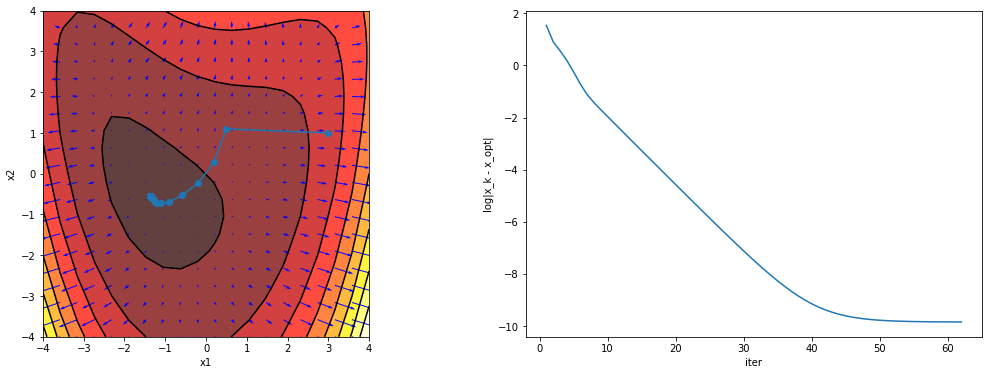

In [14]:
const = 0.01
lr = 0.9
thres = 1e-6
iter_max = 1000
ini_val = np.array([3.0, 1.0])
alpha = 0.05

x1 = np.linspace(-4, 4, 20)  # x1.shape = (20, )
x2 = np.linspace(-4, 4, 20)  # x2.shape = (20, )
X1, X2 = np.meshgrid(x1, x2)  # X1.shape = (20, 20), X2.shape = (20, 20)
X = np.array([X1, X2])  # X.shape = (2, 20, 20)
Z = f(X)  # Z.shape = (20, 20)
gradient = grad_f(X)  # gradiend.shape = (2, 20, 20)
grad_x1 = gradient[0] # grad_x1.shape = (20, 20)
grad_x2 = gradient[1] # grad_x2.shape = (20, 20)

agd = ArmijoGradientDescent(f, grad_f, const, lr, thres, iter_max, alpha)
agd.minimize(ini_val)
path = agd.path

theor_opt_pt = np.array([-1.3647, -0.5344])
abs_path = np.array([np.log(np.linalg.norm(path[i, :] - theor_opt_pt)) for i in range(path.shape[0])])
iter_path = np.arange(1, path.shape[0] + 1)

print("iter.cnt. = {}".format(agd.iter_count))
print("emp.opt.pt. = {}".format(agd.opt_x))
print("emp.opt.val. = {}".format(agd.opt_result))

fig = plt.figure(figsize=(18, 6))
axL = fig.add_subplot(1, 2, 1)
axL.contourf(x1, x2, Z, 10, alpha = .75, cmap = plt.cm.hot)
axL.contour(x1, x2, Z, levels = 10, colors = "black")
axL.quiver(x1, x2 , grad_x1, grad_x2, color = "blue")
axL.plot(path[:,0], path[:,1], marker = "o")
axL.set_xlabel("x1")
axL.set_ylabel("x2")
axL.set_aspect('equal')

axR = fig.add_subplot(1, 2, 2)
axR.set_xlabel("iter")
axR.set_ylabel("log|x_k - x_opt|")
axR.plot(iter_path, abs_path)

plt.show()

# Newton 法

**[step0]**  
Define initial_value $\boldsymbol{x}_0 \in \mathbb{R}^n$.  
Define stop threshold $\epsilon > 0$.  
Set number of updates $k=0$.  
   
**[step1]**  
Repeat the following algorithm for $k \geq 0$ until there exists $k$ satisfying $\|\nabla f(\boldsymbol{x}_k)\| < \epsilon$: 
> Set Newton direction $\boldsymbol{d}_k = - \left(\nabla^2 f(\boldsymbol{x}_k)\right)^{-1} \nabla f(\boldsymbol{x}_k)$.  
> Set $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k + \boldsymbol{d}_k$. 

# 教科書 p45 例2.6

In [0]:
class NewtonGradientDescent:
  def __init__(self, fct, grad, hess, lr = 1.0, thres = 1e-6, iter_max = 1000, alpha = 1.0):
    self.fct = fct             # 目的関数
    self.grad = grad           # 勾配
    self.hess = hess           # ヘッセ行列
    self.lr = lr               # 学習率
    self.thres = thres         # 更新停止の閾値
    self.path = None           # 解の点列
    self.iter_max = iter_max   # 最大反復回数
    self.alpha = alpha         # ステップサイズ
  
  def minimize(self, x):
    path = [x]
    
    for i in range(self.iter_max):
      grad = self.grad(x)
      hess_inv = np.linalg.inv(self.hess(x))
      direction = - self.lr * np.dot(hess_inv, grad)
      if np.linalg.norm(grad, ord = 2, axis = None) < self.thres:
        iter_count = i + 1  # 最初の0回目の分がある
        break
      x = x + self.alpha * direction
      path.append(x)
    self.iter_count = iter_count  # 反復回数
    self.opt_pt = x                # 最適解
    self.opt_val = self.fct(x) # 関数の最小値
    self.path = np.array(path)    # 探索解の推移

In [0]:
def f(x):
  return 0.5 * x[0]**4 - 2 * x[0]**2 * x[1] + 4 * x[1]**2 + 8 *x[0] + 8 * x[1]

def grad_f(x):
  grad_1 = 2 * x[0]**3 - 4 * x[0] * x[1] + 8
  grad_2 = - 2 * x[0]**2 + 8 * x[1] + 8
  return np.array([grad_1, grad_2])

def hess_f(x):
  hess_11 = 6 * x[0]**2 - 4 * x[1]
  hess_12 = -4 * x[0]
  hess_22 = 8
  return np.array([[hess_11, hess_12], [hess_12, hess_22]])

iter.cnt. = 7
emp.opt.pt. = [-1.36465561 -0.53442877]
emp.opt.val. = -10.32564871842916


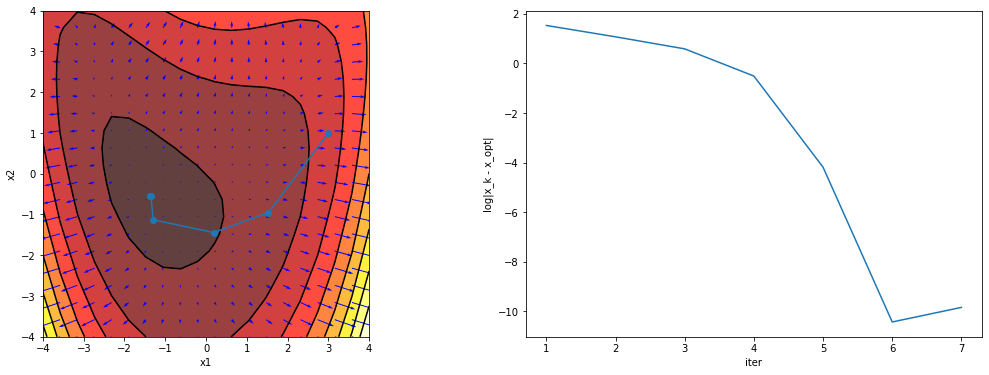

In [17]:
lr = 1.0
thres = 1e-6
iter_max = 1000
ini_val = np.array([3.0, 1.0])
alpha = 1.0

x1 = np.linspace(-4, 4, 20)  # x1.shape = (20, )
x2 = np.linspace(-4, 4, 20)  # x2.shape = (20, )
X1, X2 = np.meshgrid(x1, x2)  # X1.shape = (20, 20), X2.shape = (20, 20)
X = np.array([X1, X2])  # X.shape = (2, 20, 20)
Z = f(X)  # Z.shape = (20, 20)
gradient = grad_f(X)  # gradiend.shape = (2, 20, 20)
grad_x1 = gradient[0] # grad_x1.shape = (20, 20)
grad_x2 = gradient[1] # grad_x2.shape = (20, 20)

agd = NewtonGradientDescent(f, grad_f, hess_f, lr, thres, iter_max, alpha)
agd.minimize(ini_val)
path = agd.path
theor_opt_pt = np.array([-1.3647, -0.5344])
abs_path = np.array([np.log(np.linalg.norm(path[i, :] - theor_opt_pt)) for i in range(path.shape[0])])
iter_path = np.arange(1, path.shape[0] + 1)

print("iter.cnt. = {}".format(agd.iter_count))
print("emp.opt.pt. = {}".format(agd.opt_pt))
print("emp.opt.val. = {}".format(agd.opt_val))

fig = plt.figure(figsize=(18, 6))
axL = fig.add_subplot(1, 2, 1)
axL.contourf(x1, x2, Z, 10, alpha = .75, cmap = plt.cm.hot)
axL.contour(x1, x2, Z, levels = 10, colors = "black")
axL.quiver(x1, x2 , grad_x1, grad_x2, color = "blue")
axL.plot(path[:,0], path[:,1], marker = "o")
axL.set_xlabel("x1")
axL.set_ylabel("x2")
axL.set_aspect('equal')

axR = fig.add_subplot(1, 2, 2)
axR.set_xlabel("iter")
axR.set_ylabel("log|x_k - x_opt|")
axR.plot(iter_path, abs_path)

plt.show()